#데이터 그룹 분석
>특정 조건에 맞는 데이터가 하나 이상 존재하는 경우 데어터를 그룹화하여 분석할 수 있다.
##1. 그룹 분석
>그룹 분석은 다음과 같은 단계로 이루어져 있다.
* 범주형 기준에 따라 그룹으로 테이터 분할(splitting) - 반별 그룹
* 그룹별 함수 적용(applying) - 반별 평균
* 그룹별 실행 결과를 별도의 데이터 구조로 결합(combining) - 반별 평균 테이블

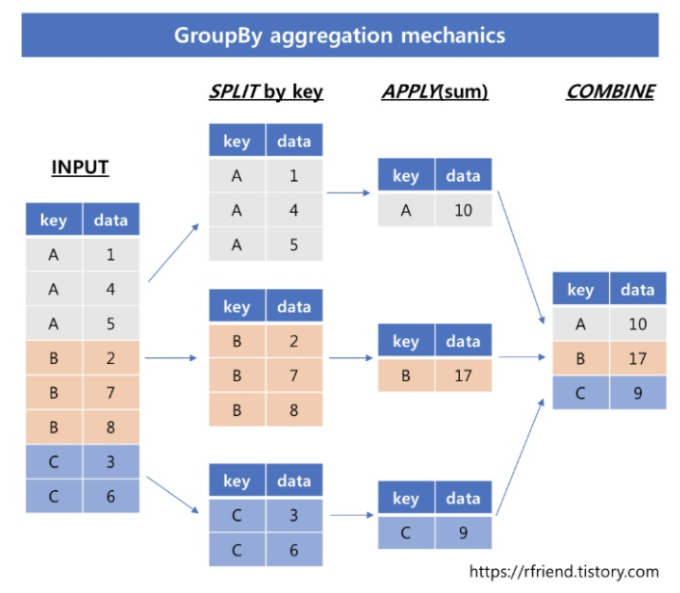

##2. 집계함수 사용
>그룹 분석에서 사용되는 groupby 함수는 그룹을 분류하는 기능을 하며 다양한 그룹 연산 메소드를 지원한다. 그럼 간단하게 groupby 함수를 사용해 보자

In [ ]:
#드라이브 로드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/4. 머신러닝/1. 분석 기초/2. 데이터 분석을 위한 기초 통계 수학/2. 데이터 탐색/Data/exam_sample.csv')
df

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,50,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,50,w


In [ ]:
df_class = df.groupby(['class'])
print(type(df_class))
df_class

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


>위와 같이 class 별로 그룹을 지었다. 우선 type으느 DataFrameGroupBy이며 별도로 결과가 출력되지는 않는다.

In [ ]:
df_class.get_group('A')

,student_no,class,science,english,math,sex
0,1,A,50,98,50,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m


> 그룹별로 데이터를 확인하기 위해선느 get_group 함수를 이용하면 된다. 위처럼 get_group의 인자로 A를 전달하면 A class의 학생정보를 확인할 수 있다.

In [ ]:
df_class.mean()

,student_no,science,english,math
class,,,,
A,2.5,61.50,94.75,46.25
B,6.5,58.25,84.25,77.50
C,9.5,30.00,95.50,35.00


>이렇게 그룹을 묶게 되면 mean 함수를 이용하여 그룹별로 평균을 구할 수 있다.

In [ ]:
df.groupby(['class', 'sex']).mean()

student_no  science  english  math
class sex                                    
A     m           2.5     54.0     98.0  40.0
      w           2.5     69.0     91.5  52.5
B     m           6.5     71.5     89.5  65.0
      w           6.5     45.0     79.0  90.0
C     w           9.5     30.0     95.5  35.0

>또한 다중 필드를 이용하여 평균을 구할 수도 있다.

In [ ]:
print(df['math'].groupby(df['class']).mean())
print(df_class['math'].mean())

class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64
class
A    46.25
B    77.50
C    35.00
Name: math, dtype: float64


>클래스 내의 과목별 평균도 구할 수 있으며 다양한 방법으로 표현할 수 있다.

In [ ]:
df_class['english'].count()
df_class['english'].min()
df_class['english'].max()

class
A    4
B    4
C    2
Name: english, dtype: int64

In [ ]:
df_group = pd.DataFrame()
df_group['cnt']=df_class['english'].count()
df_group['min']=df_class['english'].min()
df_group['max']=df_class['english'].max()

df_group

,cnt,min,max
class,,,
A,4,86,98
B,4,78,90
C,2,93,98


In [ ]:
# 오름차순 정렬
df_group.sort_values(by=['min'])
# 내림차순 정렬(ascending=False)
df_group.sort_values(by=['min'], ascending=False)

,cnt,min,max
class,,,
C,2,93,98
A,4,86,98
B,4,78,90


In [ ]:
# inplace=True => 변경된 데이터를 바로 저장
# df_group = df_group.sort_values(by=['min'], ascending=False)
df_group.sort_values(by=['min'], ascending=False, inplace=True)
df_group

In [ ]:
# 간단한 집계함수를 열별로 처리할 수 있으며 사용자 정의 함수도 적용 가능하다.
import numpy as np

def my_max(x):
  return np.max(x)

df_class.agg({'math':my_max, 'english':np.min})

df_class.agg({'math':np.max, 'english':np.min})

df_class.agg({'math':np.max, 'english':np.min, 'science':np.mean})

,math,english
class,,
A,60,86
B,90,78
C,50,93
